<a href="https://colab.research.google.com/github/weyj4/GCP_ML/blob/main/FastAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install fastbook
from fastbook import *

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 719 kB 5.3 MB/s 
     |████████████████████████████████| 441 kB 57.4 MB/s 
     |████████████████████████████████| 5.3 MB 35.3 MB/s 
     |████████████████████████████████| 1.3 MB 48.2 MB/s 
     |████████████████████████████████| 1.6 MB 34.0 MB/s 
     |████████████████████████████████| 115 kB 46.4 MB/s 
     |████████████████████████████████| 163 kB 55.8 MB/s 
     |████████████████████████████████| 212 kB 54.9 MB/s 
     |████████████████████████████████| 127 kB 59.9 MB/s 
     |████████████████████████████████| 115 kB 46.6 MB/s 
     |████████████████████████████████| 7.6 MB 56.2 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [ ]:
urls = search_images_ddg('bird photos', max_images=1)
len(urls), urls[0]

(1,
 'https://static.photocdn.pt/images/articles/2015-7/iStock_000070569703_Medium.jpg')

In [ ]:
dest = Path('bird.jpg')
if not dest.exists(): download_url(urls[0], dest, show_progress=False)

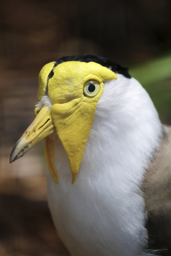

In [ ]:
im = Image.open(dest)
im.to_thumb(256, 256)

In [ ]:
searches = 'forest', 'bird'
path = Path('bird_or_not')

dest = path
dest.mkdir(exist_ok=True)

# if not path.exists():
for o in searches:
  print(path/o)
  dest = (path/o)
  dest.mkdir(exist_ok=True)
  results = search_images_ddg(f'{o} photo')
  download_images(dest, urls=results[:200])
  resize_images(dest, max_size=400, dest=dest)

bird_or_not/forest
bird_or_not/bird


In [ ]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)

(#2) [None,None]

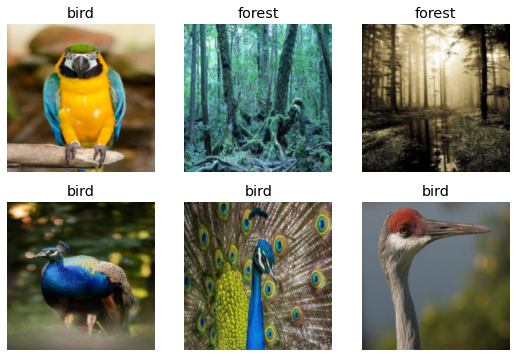

In [ ]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path)

dls.show_batch(max_n=6)

In [ ]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:284: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f370

  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,0.698735,0.698061,0.220779,00:37


epoch,train_loss,valid_loss,error_rate,time
0,0.054081,0.059768,0.025974,00:54
1,0.038816,0.005060,0.000000,00:51
2,0.026803,0.005279,0.000000,00:51


In [ ]:
is_bird,_,probs = learn.predict(PILImage.create('bird.jpg'))
print(f'This is a: {is_bird}.')
print(f'Probability: {probs[0]:.4f}')

This is a: bird.
Probability: 0.9999


In [ ]:
searches = ['guitar', 'banjo']
path = Path('instruments')

path.mkdir(exist_ok=True)

for search in searches:
  dest = Path(f'{path}/{search}')
  path.mkdir(exist_ok=True)
  ims = search_images_ddg(search)
  download_images(dest, urls=ims[:200])
  resize_images(dest, max_size=400, dest=dest)

guitars = search_images_ddg('guitar')
len(guitars)

200

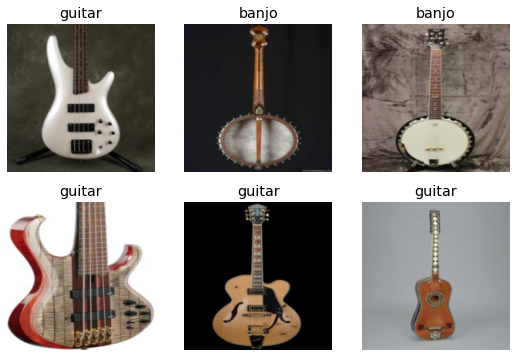

In [ ]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path)

dls.show_batch(max_n=6)

In [ ]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)

(#2) [None,None]

In [ ]:
print(path)

instruments


In [ ]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,1.020933,0.213261,0.090909,00:38


epoch,train_loss,valid_loss,error_rate,time
0,0.118721,0.196404,0.051948,00:52
1,0.100926,0.207036,0.038961,00:54
2,0.069912,0.187311,0.038961,00:55


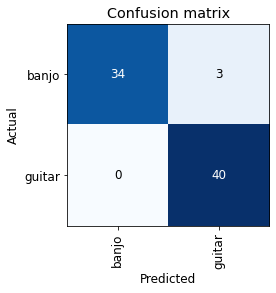

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [ ]:
from fastai.vision.widgets import *

cleaner = ImageClassifierCleaner(learn)
cleaner

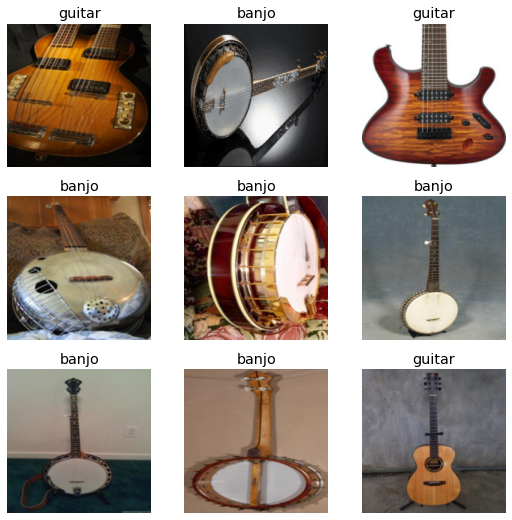

In [ ]:
dls.show_batch()

In [ ]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.213199,0.218975,0.064935,01:07


epoch,train_loss,valid_loss,error_rate,time
0,0.105487,0.141295,0.012987,01:40
